
# Project: Investigate a Dataset (The Movie Database -TMDb-)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Each year hundreds of new movies relased for cinema lovers. This bring the question: what are the factores that effect the movie success? is it the movie budget ? or user rating ? or there are some other factors?
In this project, we will investigate a dataset that contains information about 10,000 movies taken from (The Movie Database TMDb).

### Project Goal 
In this project, we will experiance the whole process of data analysis using the Python libraries NumPy, pandas, and Matplotlib. At the end, we will present our findings.

### Questions
We will explore this dataset to find answers to the following questions:
- Question 1: What is the relationship between Revenue and release year? 
- Question 2: Do high budget means high revenue as well?
- Question 3: What decade had the highest average revenue?
- Question 4: Does "user rating" and "run time" factors differ in old movies than in the new movies? 



In [277]:
# imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To make sure that visualizations will be pop up in my notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Now we will load the data, and inspect it to understand it's structure and check for cleanliness.

### Reading and understanding Data

In [278]:
# load dataset and print few rows
df=pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the previous dataset sample, we can see that we have the following columns:
- id: movie id
- imdb_id: the movie id inside the The Movie Database TMDb)
- popularity: number representing movie popularity.
- budget and revenue: number but no currency specified.
- original_title: movie title.
- cast: list of names, contain multiple values separated by pipe (|)characters.There are some odd characters will be left as they are.
- homepage: link to movies homepge.
- director: director name.
- tagline: short text to clarify movie idea.
- overview: a paragraph give an overview about the movie.
- runtime: movie time by minutes.
- genres: movie genres, contain multiple values separated by pipe (|)characters.
- production_companies: list of companies names.
- release date: date.
- vote_count: number of votes.
- vote_average: number representing vote average.
- release_year: movie release year.
- budget_adj and revenue_adj:show the budget and revenue in terms of 2010 dollars, accounting for inflation over time.

### General Data Properties

In [279]:
df.shape

(10866, 21)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [281]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are 10866 movies rows in this dataset with 21 columns. From the initial checking we found that:
- There are some unnecessary columns.
- There are missing data in some columns.
- The 'release_date' column has string data type instead of date datatype.
- No currency specified for budget and revenue, so we will assume that currency is US dollar $.
- There are data with 'Zero' in budget, revenue and runtime columns.

------------------------------------------------------------------------------------------

### Data Cleaning

Let's check now if there are problems need to be fixed with the dataset.

#### Missing Data

From the above statistical summary:
There are missing data in the columns: 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'.
- The 'imdb_id' is an additional index and it has no beneficial in this analysis and it will be dropped.
- The remaining columns cann't be considered as "categorical variables" since the number of unique values in each column are huge as clarified in the cell below. There content is just text that will not be used to answer our questions. So we will drop them from the dataset 

In [282]:
# count how many unique values in the mentioned columns below
col = ['cast','homepage','tagline','keywords','overview','production_companies']
print_count = {}
for column in df:
    if column in col:
        print_count[column] = df[column].nunique()
print(print_count)

{'cast': 10719, 'homepage': 2896, 'tagline': 7997, 'keywords': 8804, 'overview': 10847, 'production_companies': 7445}


- Also,'id' and 'popularity' columns will not be used in the analysis and they will be dropped.

##### Dropping Unused Columns:

In [283]:
df.drop(['id','popularity','imdb_id','cast','homepage','tagline','keywords','overview','production_companies'], axis=1, inplace=True)

In [284]:
df.head()

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Also, from the statistical information above, there are 44 missing values in the 'director' column,and 2031 missing values in the 'genres' column. To solve this we will drop these rows.
##### Dropping Rows with Missing values:

In [285]:
df = df.dropna(axis=0, subset=['director','genres'])

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10801 non-null  int64  
 1   revenue         10801 non-null  int64  
 2   original_title  10801 non-null  object 
 3   director        10801 non-null  object 
 4   runtime         10801 non-null  int64  
 5   genres          10801 non-null  object 
 6   release_date    10801 non-null  object 
 7   vote_count      10801 non-null  int64  
 8   vote_average    10801 non-null  float64
 9   release_year    10801 non-null  int64  
 10  budget_adj      10801 non-null  float64
 11  revenue_adj     10801 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB


##### Droping Revenue and budget with value 0

As we mentioned above, there are 'Zero' data in budget and revenue columns.
Since these columns are important in the analysis, we will drop the rows with missing values in these two columns.

We can see in the cell below, there are 6947 rows with missing data in budget or revenue or both.

In [287]:
zero_br=df.query('budget==0 or revenue==0')
zero_br

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,0,29355203,Mr. Holmes,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,0,22354572,Solace,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,30000000,0,Wild Card,Simon West,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,20000000,0,Survivor,James McTeigue,96,Crime|Thriller|Action,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


After dropping these rows as shown below, only 3854 rows left.

In [288]:
df=df.query('budget !=0 and revenue !=0')
df

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


Let's check the min values for budget and revenue to make sure that 0 values dropped:

In [289]:
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,3.721040e+07,1.076840e+08,109.204463,527.745978,6.167955,2001.261546,4.424668e+07,1.370621e+08
std,4.220503e+07,1.765408e+08,19.912258,879.943178,0.795121,11.282931,4.480521e+07,2.161130e+08
min,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,2.400000e+07,4.480000e+07,105.500000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### Duplicated Data

There is only one duplicated rows and we will drop it as shown in the cell below:

In [290]:
sum(df.duplicated())

1

In [291]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

#### Incorrect Data Type
We noticed that 'release_date' column has string data type. We will convert it to date.

In [292]:
df.release_date = pd.to_datetime(df['release_date'])

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3853 non-null   int64         
 1   revenue         3853 non-null   int64         
 2   original_title  3853 non-null   object        
 3   director        3853 non-null   object        
 4   runtime         3853 non-null   int64         
 5   genres          3853 non-null   object        
 6   release_date    3853 non-null   datetime64[ns]
 7   vote_count      3853 non-null   int64         
 8   vote_average    3853 non-null   float64       
 9   release_year    3853 non-null   int64         
 10  budget_adj      3853 non-null   float64       
 11  revenue_adj     3853 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 391.3+ KB


The dataset now is clean and ready to be explored.

-------------------------------------------------------------------------------------------

<a id='eda'></a>
## Exploratory Data Analysis

Let's see the distribution of variables to find out some general information:



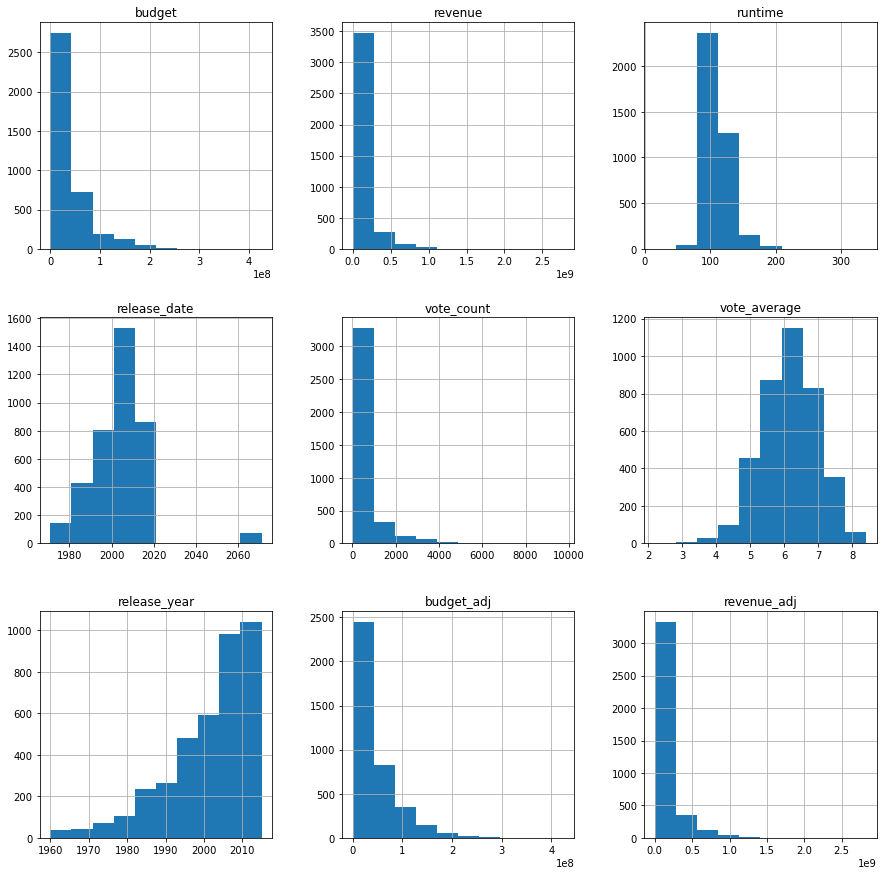

In [294]:
df.hist(figsize=(15,15));

From the histograms above we can infer the following information:
- Budget and revenue skwed to the right with majority amounts less than 1 milion $.
- Run time range between 50 to 210 min. Average is approximitly 100 min.
- Majority of votes counts is less than 1000 votes. 
- Most of movies released between years 2005 and 2015
- There is an unusual data (outlier) in the 'release date' variable with year > 2060. We checked and found that there are 82 rows with these values. We will assume it is a Data entry errors especially that the value recorded in 'release year' column is not identical.

In [295]:
# check release year outlier data
ry=df.query('release_date>2060')
ry

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,12000000,56715371,2001: A Space Odyssey,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08
9720,5800000,33395426,Planet of the Apes,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08
9724,5500000,42300873,Bullitt,Peter Yates,113,Action|Crime|Drama|Thriller,2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08
9727,3200000,33395426,Rosemary's Baby,Roman Polanski,136,Horror|Drama|Mystery,2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08
9729,10000000,16800000,Oliver!,Carol Reed,153,Drama|Family|Music,2068-09-26,42,6.2,1968,6.268964e+07,1.053186e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


### Research Question 1 (What is the relationship between Revenue and release year? )

In [296]:
#User-defined function to draw a plot 
def plot_func(xcolumn,ycolumn,plot_type):
    return df.plot(x=xcolumn,y=ycolumn,kind=plot_type)

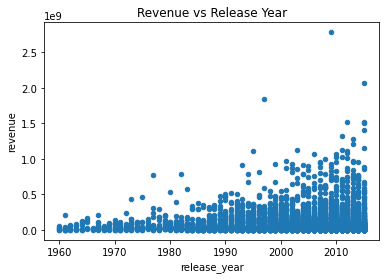

In [297]:
#draw a scatter plot "Revenue vs. Release_year"
plot_func('release_year','revenue','scatter');
plt.title('Revenue vs Release Year');

The plot above, shows that, the movies numbers is increasing year by year and there is a slight increase in the revenue from 1960 to 2015.

### Research Question 2  (Do high budget means high revenue as well?)

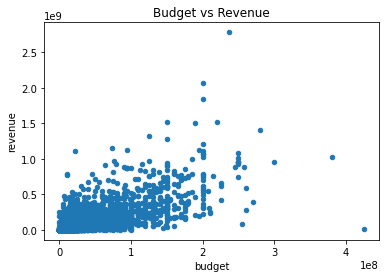

In [298]:
#draw a scatter plot "Budget vs. Revenue"
plot_func('budget','revenue','scatter');
plt.title('Budget vs Revenue');


From the above chart, we can say that there is no a strong relationship between budget and revenue. So more factors need to be analyzed.

### Research Question 3  (What decade had the highest revenue average)

We want to know is there a relationship between the revenue and the decade in which the movie was released.
First of all, we will divide the data according to the release year into sex groups ['1960s','1970s','1980s','1990s','2000s','2010s'] as shown in the cell below:

In [299]:
# bin edge will be used to cut the data into groups
bin_edges=[1960,1970,1980,1990,2000,2010,2020]
# Labels for the centries names
bin_names=['1960s','1970s','1980s','1990s','2000s','2010s']
# Creat'decade' column
df['decade']=pd.cut(df['release_year'],bin_edges,labels=bin_names)
# to examine the data
df.head(500)

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,25000000,4388563,Beyond a Reasonable Doubt,Peter Hyams,105,Drama,2009-02-05,42,5.6,2009,2.541001e+07,4.460537e+06,2000s
1674,8000000,29010817,New in Town,Jonas Elmer,97,Comedy|Romance,2009-01-30,50,5.3,2009,8.131203e+06,2.948661e+07,2000s
1675,25000000,2336172,Me and Orson Welles,Richard Linklater,114,Comedy|Drama|Romance,2009-11-25,24,6.4,2009,2.541001e+07,2.374486e+06,2000s
1676,40000000,28972508,Shorts,Robert Rodriguez,89,Comedy|Family,2009-08-21,20,4.8,2009,4.065602e+07,2.944767e+07,2000s


Now, lets calcualte the mean revenue for each century:

In [300]:
revenue_by_centries=df.groupby(['decade'],as_index=False)['revenue'].mean()

To visualize it, we will draw a bar chart as follows: 

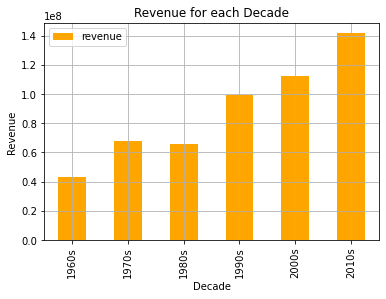

In [301]:
revenue_by_centries.plot(x='decade',y='revenue',color='Orange',kind='bar');
plt.xlabel('Decade')
plt.ylabel('Revenue')
plt.title('Revenue for each Decade')
plt.grid(True)

From the chart, it's highly noticed that the revenue is increasing sharply each decade. Only 80s had a decrease comparing to 70s.

### Research Question 4  (Does "user rating" and "run time" factors differ in old movies than in the new movies?)

We will divide the movies into two groups:
- old movies: movies produced before year 2000
- new movies: movies produced during and after year 2000

In [302]:
# Divide the data into two groups
oldmovies=df.query('release_year<2000')
newmovies=df.query('release_year>=2000')

# Make sure that the number of total rows is complete after dividing 
allmovies=df.shape[0]
allmovies==oldmovies.shape[0]+newmovies.shape[0]

True

In [303]:
oldmovies['vote_average'].mean(),newmovies['vote_average'].mean(),

(6.280059084194981, 6.107683073229284)

In [304]:
oldmovies['runtime'].mean(),newmovies['runtime'].mean(),

(111.29320531757755, 108.0796318527411)

From the above result, it seems there is no difference in average user rating and average run time between old and new movies.

<a id='conclusions'></a>
## Conclusions

From the above analysis we came out with some knowledge about movies produced during the period 1960-2015:
- The spent budget has no relation with the earned revenue.
- The Average duration of the movie is around 100 minutes and average user rating is 6.0.
- No difference in average user rating and average run time between old and new movies.

### Limitations: 
Still there is more and more to explore data in this dataset and more questions to answer but we noticed the following:

1-There are some data need to be corrected for example:
- There are some odd characters in the "director" columns. This need cleaning to answer some questions like: "Who is the director who achieved the highest revenue?", “How many movies produced by each director?”.
- There are conflicts found in 'release_year' and 'release_date' columns. For example we found in some rows if the release_year is 1968, the release_date is 2068. It is obvious that these are data entry errors.

2-Different aspects could be analyzed if dataset conation data about movie’s writer, leading actor, and country.

3-The dataset will be more informative if the names in ‘cast’ column and ‘production-companies’ column separated in different columns.


